# COMS21202: Symbols, Patterns and Signals #
# Lab 4: Probabilistic Models #

---
Tip: You will need to refer to the lecture slides and the help pages to complete this exercise.  

In [15]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1. Normal distribution ##
You believe that your data follows a normal distribution. Assuming the standard deviation ($\sigma$) is 0.5, you wish to estimate the mean $\mu$ of the normal distribution representing your data.
You thus have a model with a single parameter $\mu$ you wish to tune/train.
Discuss with your lab partner how the likelihood $p(D|\mu)$ for some observations $D = \{d_1, \cdots, d_N\}$ can be represented by (assuming independent observations):
\begin{align}
p(D|\theta) &= \prod_i \mathcal{N}(d_i|\theta, 0.25)\\
&= \prod_i \frac{2}{\sqrt{2 \pi}} e^{-2(d_i - \mu)^2}
\end{align}

### Your comments ###

Put here any comments

---
<font color="red">Correct answer</font>  
Observations are independent,
\begin{align*}
p(D|\theta) &= \prod_i \mathcal{N}(d_i|\theta, 0.25)\\
&= \prod_i \frac{1}{\sqrt{2 \pi} (0.5)} e^{\frac{-(d_i - \mu)^2}{2 \times (0.5)^2}}\\
&= \prod_i \frac{2}{\sqrt{2 \pi}} e^{-2(d_i - \mu)^2}
\end{align*}

---

## 2. MLE ##
Use the Maximum Likelihood Estimate (MLE) recipe to find $\mu_{ML}$.  
*Note:* This is done on paper (or preferably in $\LaTeX$ in the cell below), not using `Python`.

### MLE Derivation ###

Put your latex derivation here

---
<font color="red">Correct answer</font>  
\begin{align*}
&\ln p(D|\theta) = \sum_i \ln \frac{2}{\sqrt{2 \pi}} + \sum_i {-2(d_i - \mu)^2}\\
&\frac{d}{d \theta} \ln p(D|\theta) = \sum_i 4 (d_i - \mu) = 4 (\sum_i d_i - N \mu)\\
&4 (\sum_i d_i - N \mu_{ML}) = 0\\
&\mu_{ML} = \frac{\sum_i d_i}{N}
\end{align*}

---

## 3. MLE calculations ##
In this lab, we aim to help you understand MLE by experimenting with different values of $\mu$ to find $\mu_{ML} = arg\,max_\mu \, p(D|\mu)$.

**a) **Load the data from file `data1.dat` and plot a histogram of the data.

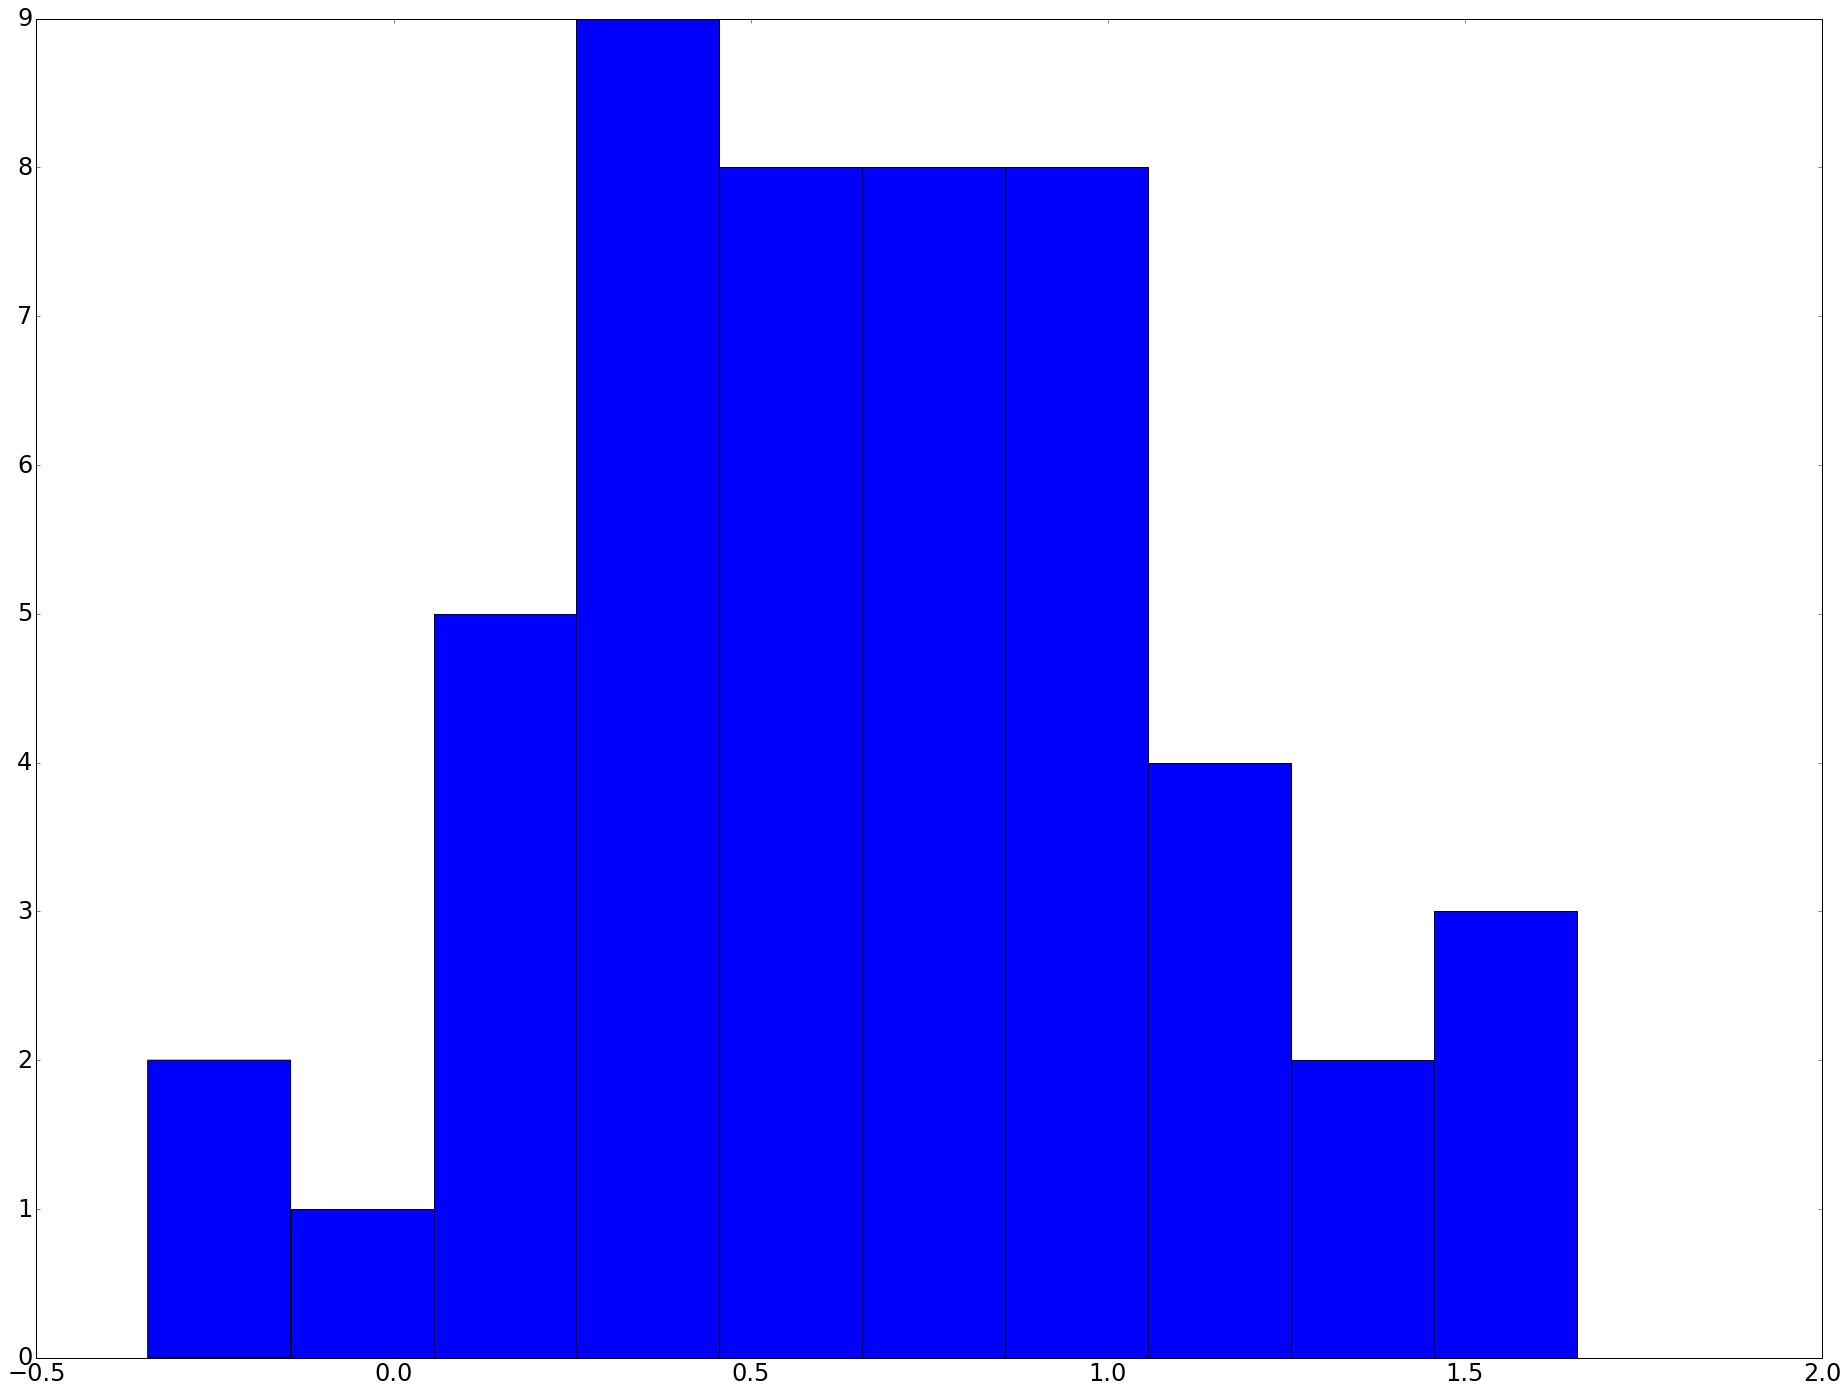

In [16]:
# put your code here

##CORRECT ANSWER##
D = np.loadtxt('data1.dat', delimiter=',')

plt.hist( D )
plt.show()
##CORRECT ANSWER##

### Your comments ###

Put here any comments

**b) ** Write a function `computeLikelihood(D, mu)` that takes a value of $\mu$ (e.g. $\mu$ = 0), and computes $p(D | \mu)$ using equation given in *Q1* for the data in `data1.dat`.  You may use the `Python` function `np.prod` in the calculation.

$$
p(D | \mu) = \prod_i \frac{2}{\sqrt{2 \pi}} e^{-2(d_i - \mu)^2}
$$

In [17]:
# put your code here

##CORRECT ANSWER##
def computeLikelihood(data, mu):
    pdf = stats.norm.pdf(data, loc=mu, scale=0.5)
    pdf_p = pdf.prod()
    return pdf_p
##CORRECT ANSWER##

**c) **Write a function `loopLikelihood(D)` that loops through possible values of  
$\mu \in \{0.00, 0.01, 0.02, ... , 1.00\}$, calls `computeLikelihood(D, mu)` for each value and stores an array of all likelihood values.

In [18]:
# put your code here

##CORRECT ANSWER##
def loopLikelihood(data):
    ml = np.zeros(shape=(101, 2))
    for i, mu in enumerate(np.linspace(0, 1, 101)):
        pdf = computeLikelihood(data, mu)
        ml[i, :] = [mu, pdf]
    return ml
##CORRECT ANSWER##

**d) **Based on your calculation, what would $\max p(D|\mu)$ be? What would $arg\,max_\mu \, p(D|\mu)$ be? Make sure you understand the difference between the two.

In [19]:
# put your code here

##CORRECT ANSWER##
lml = loopLikelihood(D)
max_lml = lml[:, 1].argmax()
print lml[max_lml, :]
print "The correct value for file `data1.dat` is: ", lml[max_lml, 0]
##CORRECT ANSWER##

[  6.70000000e-01   4.49119237e-14]
The correct value for file `data1.dat` is:  0.67


**e) **Plot $\mu$ against $p(D|\mu)$ for different $\mu$ values. Can you visually spot $\mu_{ML}$.

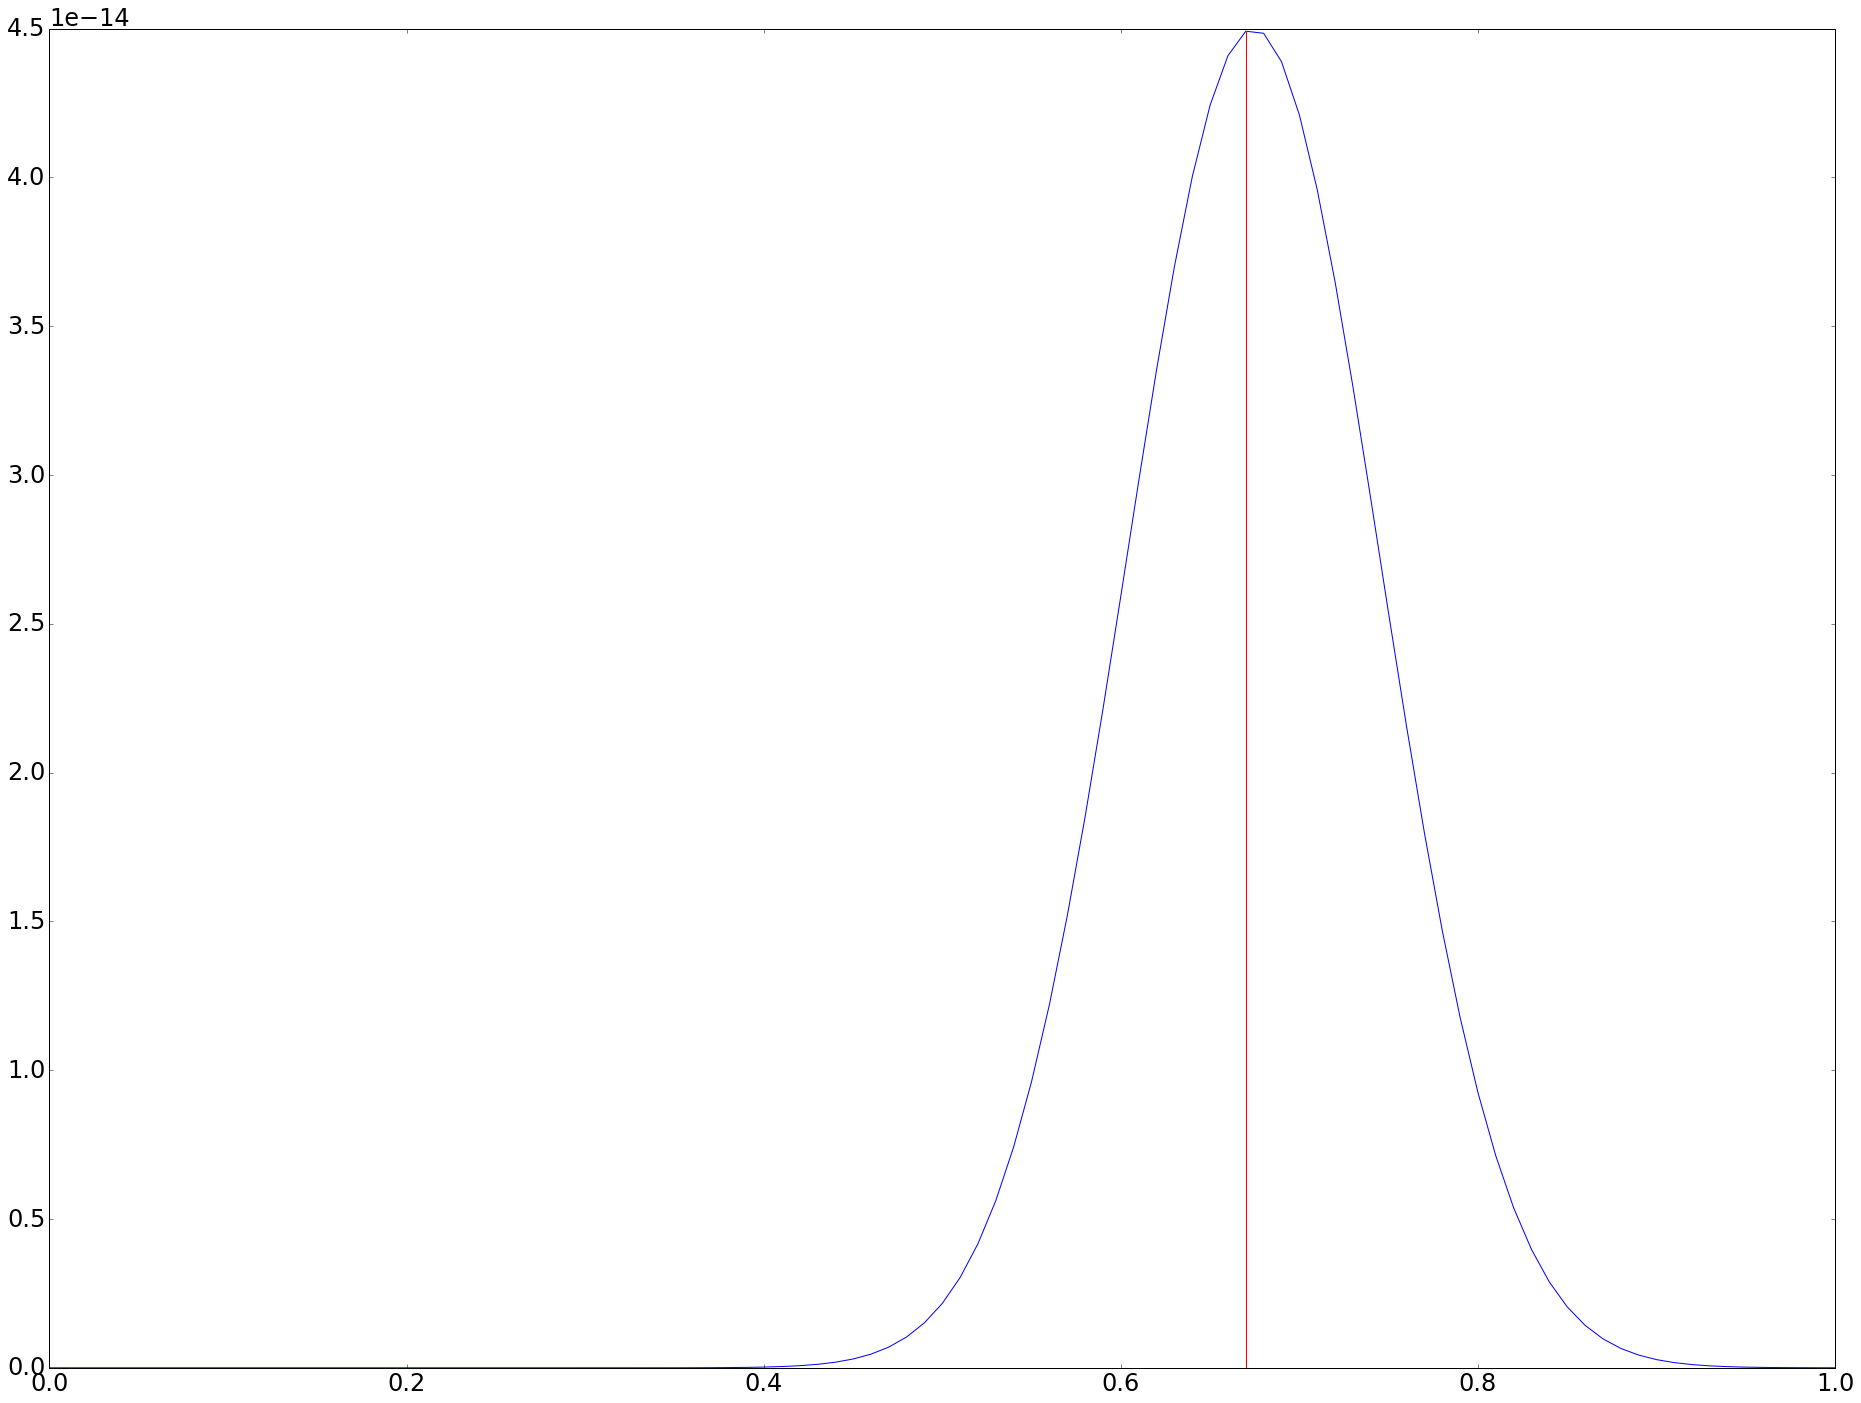

In [20]:
# put your code here

##CORRECT ANSWER##
plt.plot(lml[:, 0], lml[:, 1])
plt.plot( (lml[max_lml, 0], lml[max_lml, 0]), (0, lml[max_lml, 1]), color='r' )
plt.show()
##CORRECT ANSWER##

**f) **How does this compare to $\mu_{ML}$ you concluded in *Q2* of this sheet.

In [21]:
# put your code here

##CORRECT ANSWER##
print "Data average: ", D.mean()
##CORRECT ANSWER##

Data average:  0.67423394


---
<font color="red">Correct answer</font>  
Correct value of $\mu$ is the average of the data which is 0.6742

---

**g) **Assume you have prior knowledge of what $\mu_{ML}$ should be, $p(\mu) = \mathcal{N}(0.5,0.01)$. Write functions `computePosterior(D, mu)` and `loopPosterior(D)` to find  
$\mu_{MAP} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

In [22]:
# put your code here

##CORRECT ANSWER##
def computePosterior(data, mu):
    likelihood_vec = stats.norm.pdf(data, loc=mu, scale=0.5)
    likelihood = likelihood_vec.prod()
    
    posterior = likelihood * stats.norm.pdf(mu, loc=0.5, scale=0.1)
    return posterior # , likelihood

def loopPosterior(data):
    posterior = np.zeros(shape=(101, 2))
    for i, mu in enumerate(np.linspace(0, 1, 101)):
        p = computePosterior(data, mu)
        posterior[i, :] = [mu, p]
    return posterior

pos = loopPosterior(D)
max_pos = pos[:, 1].argmax()
print pos[max_pos, :]
print "The correct value for file `data1.dat` is ", pos[max_pos, 0]
##CORRECT ANSWER##

[  6.20000000e-01   6.51055944e-14]
The correct value for file `data1.dat` is  0.62


**h) **plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

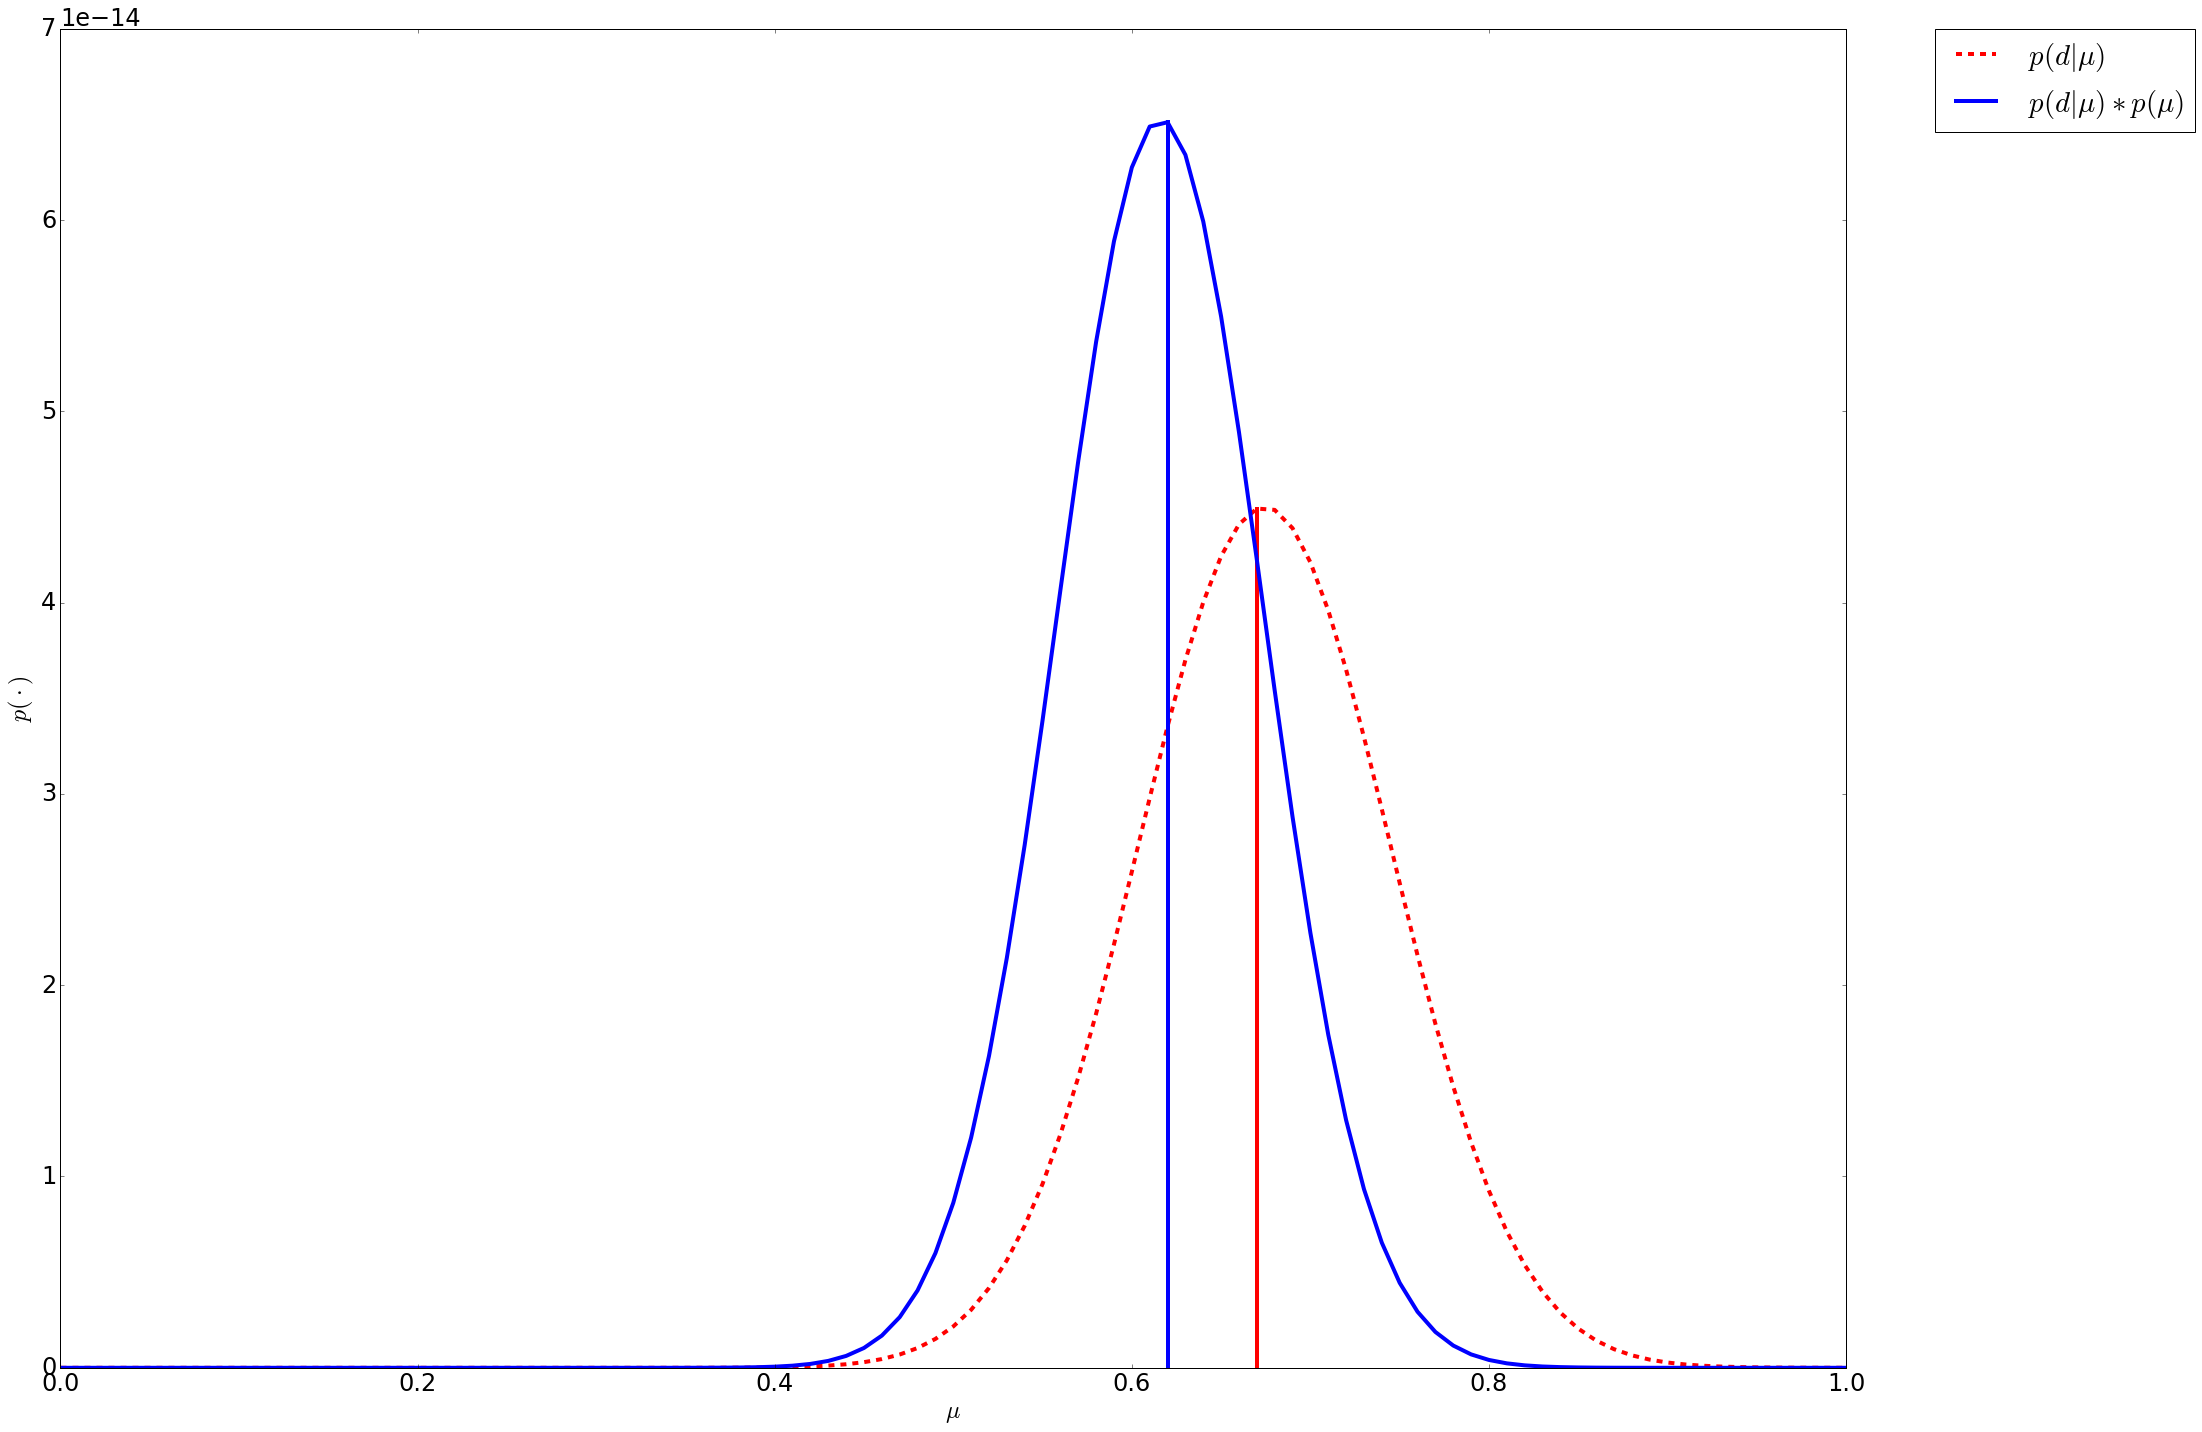

In [23]:
# put your code here

##CORRECT ANSWER##
plt.plot(lml[:, 0], lml[:, 1], color='r', linestyle='--', lw=4, label='$p(d|\mu)$')
plt.plot( (lml[max_lml, 0], lml[max_lml, 0]), (0, lml[max_lml, 1]), color='r', lw=4 )

plt.plot(pos[:, 0], pos[:, 1], color='b', linestyle='-', lw =4, label='$p(d|\mu)*p(\mu)$')
plt.plot( (pos[max_pos, 0], pos[max_pos, 0]), (0, pos[max_pos, 1]), color='b', lw=4 )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$\mu$')
plt.ylabel('$p(\cdot)$')

plt.show()
##CORRECT ANSWER##

**i) **Repeat the above calculations for `data2.dat` and `data3.dat` and explain your observations.

[  7.90000000e-01   3.14908142e-15]
The correct value for file `data2.dat` is:  0.79
[  6.90000000e-01   7.69268972e-16]
The correct value for file `data2.dat` is  0.69


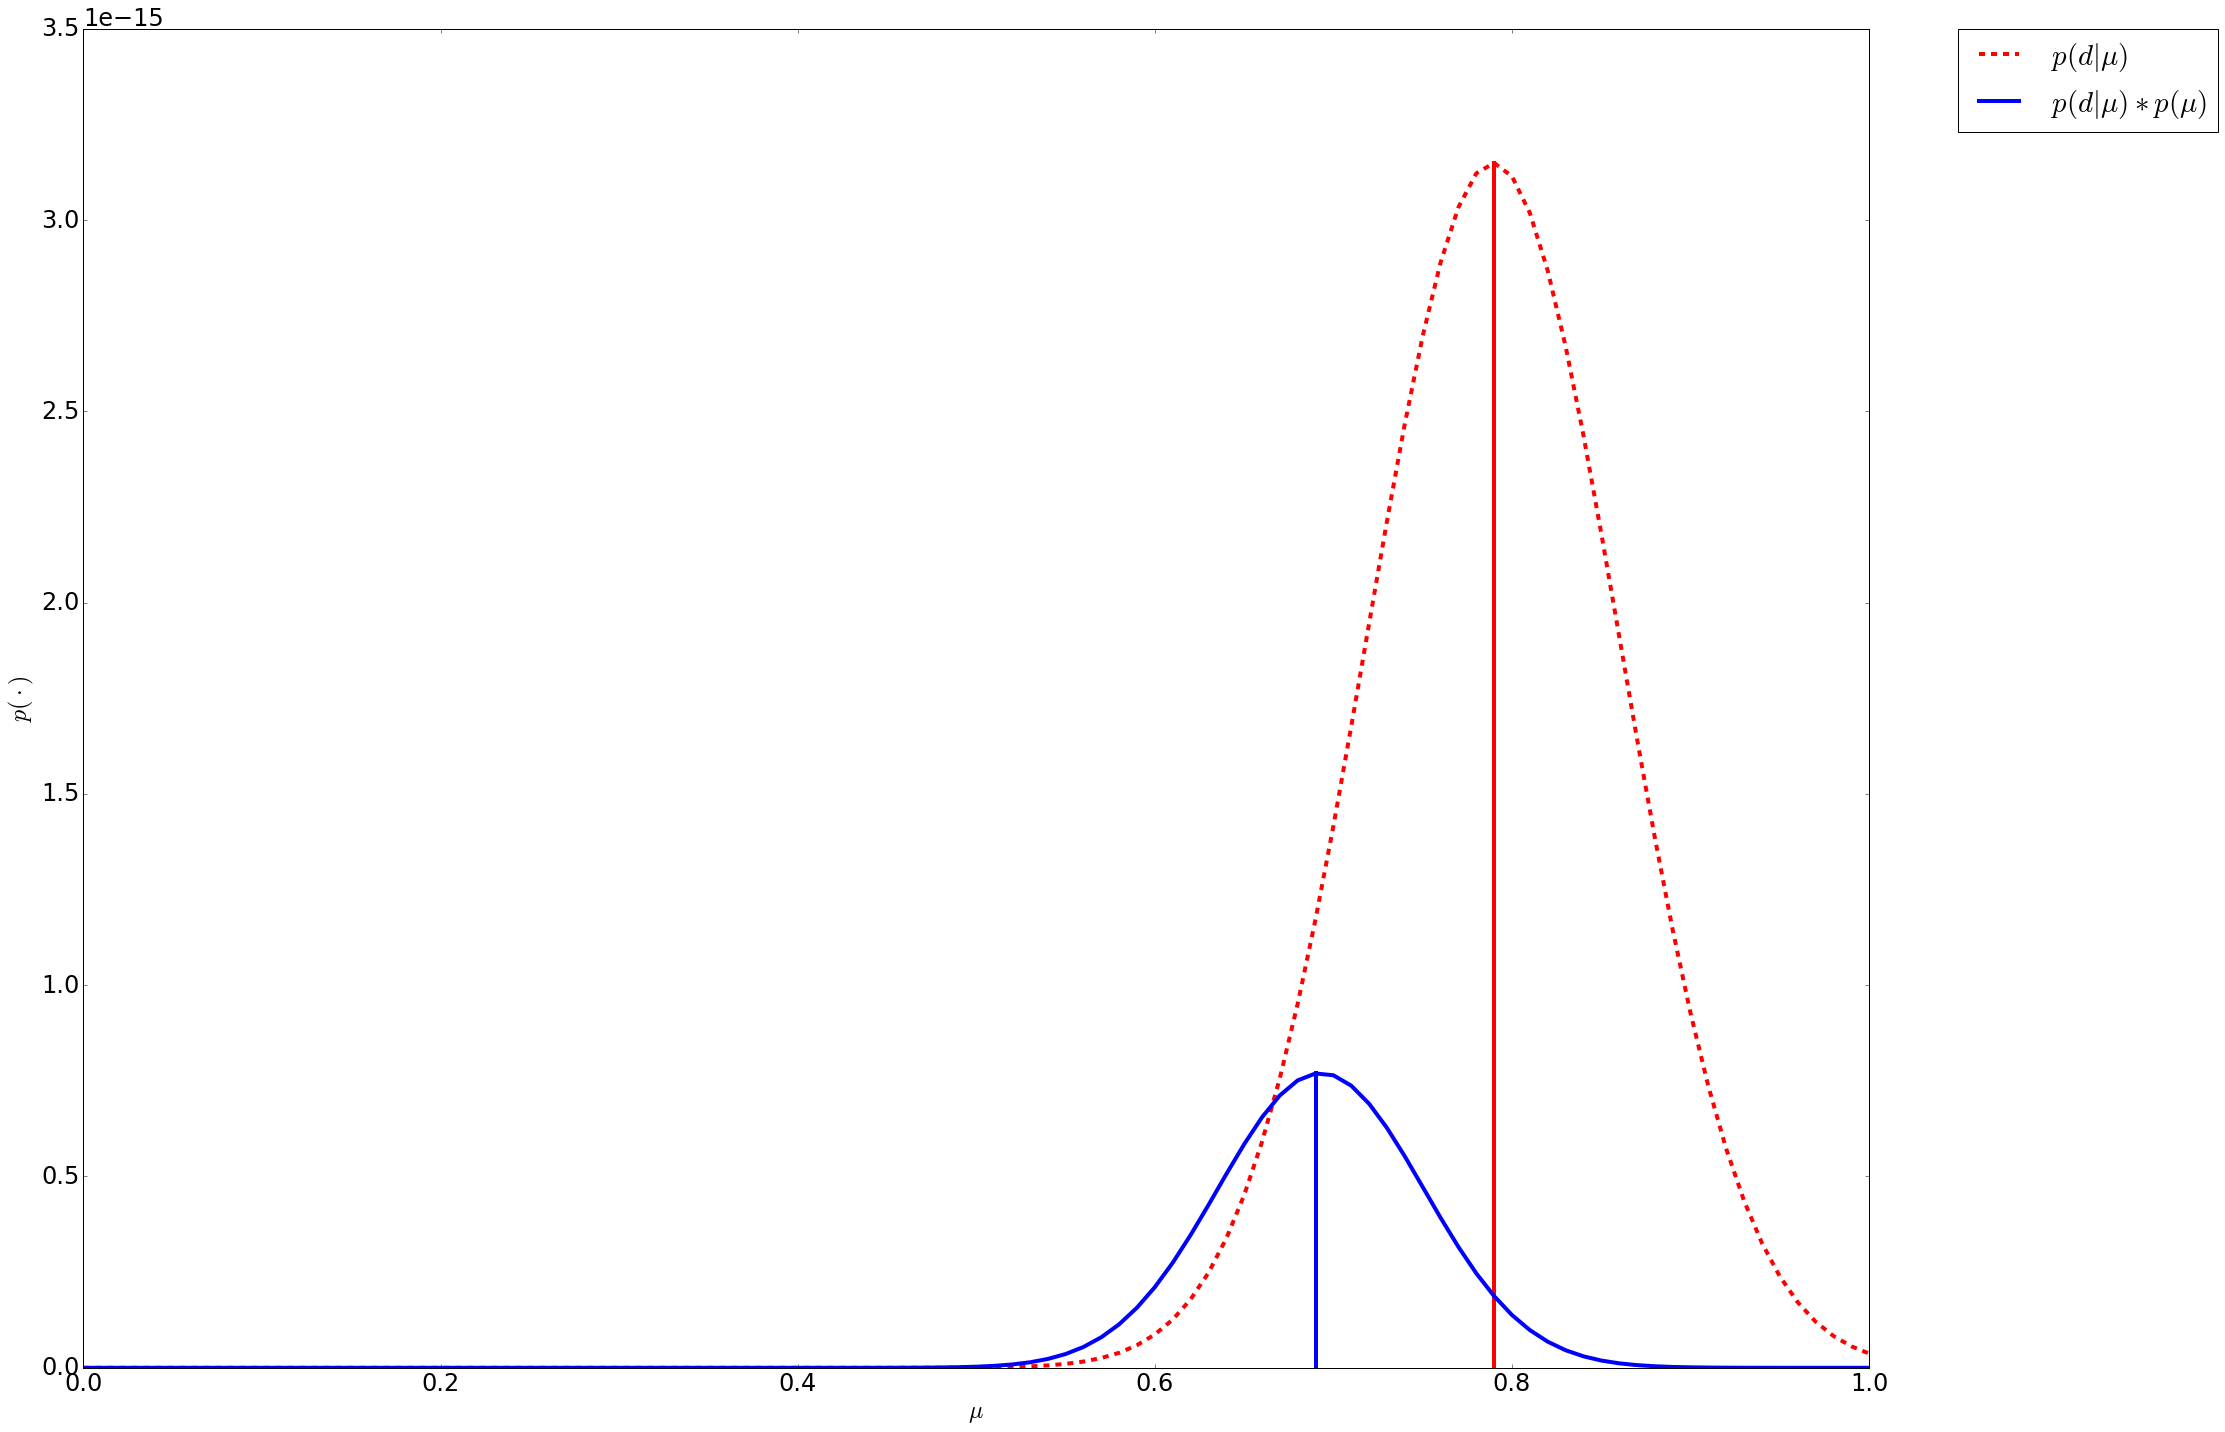

[  4.50000000e-01   9.85499147e-14]
The correct value for file `data3.dat` is:  0.45
[  4.70000000e-01   3.65295790e-13]
The correct value for file `data3.dat` is  0.47


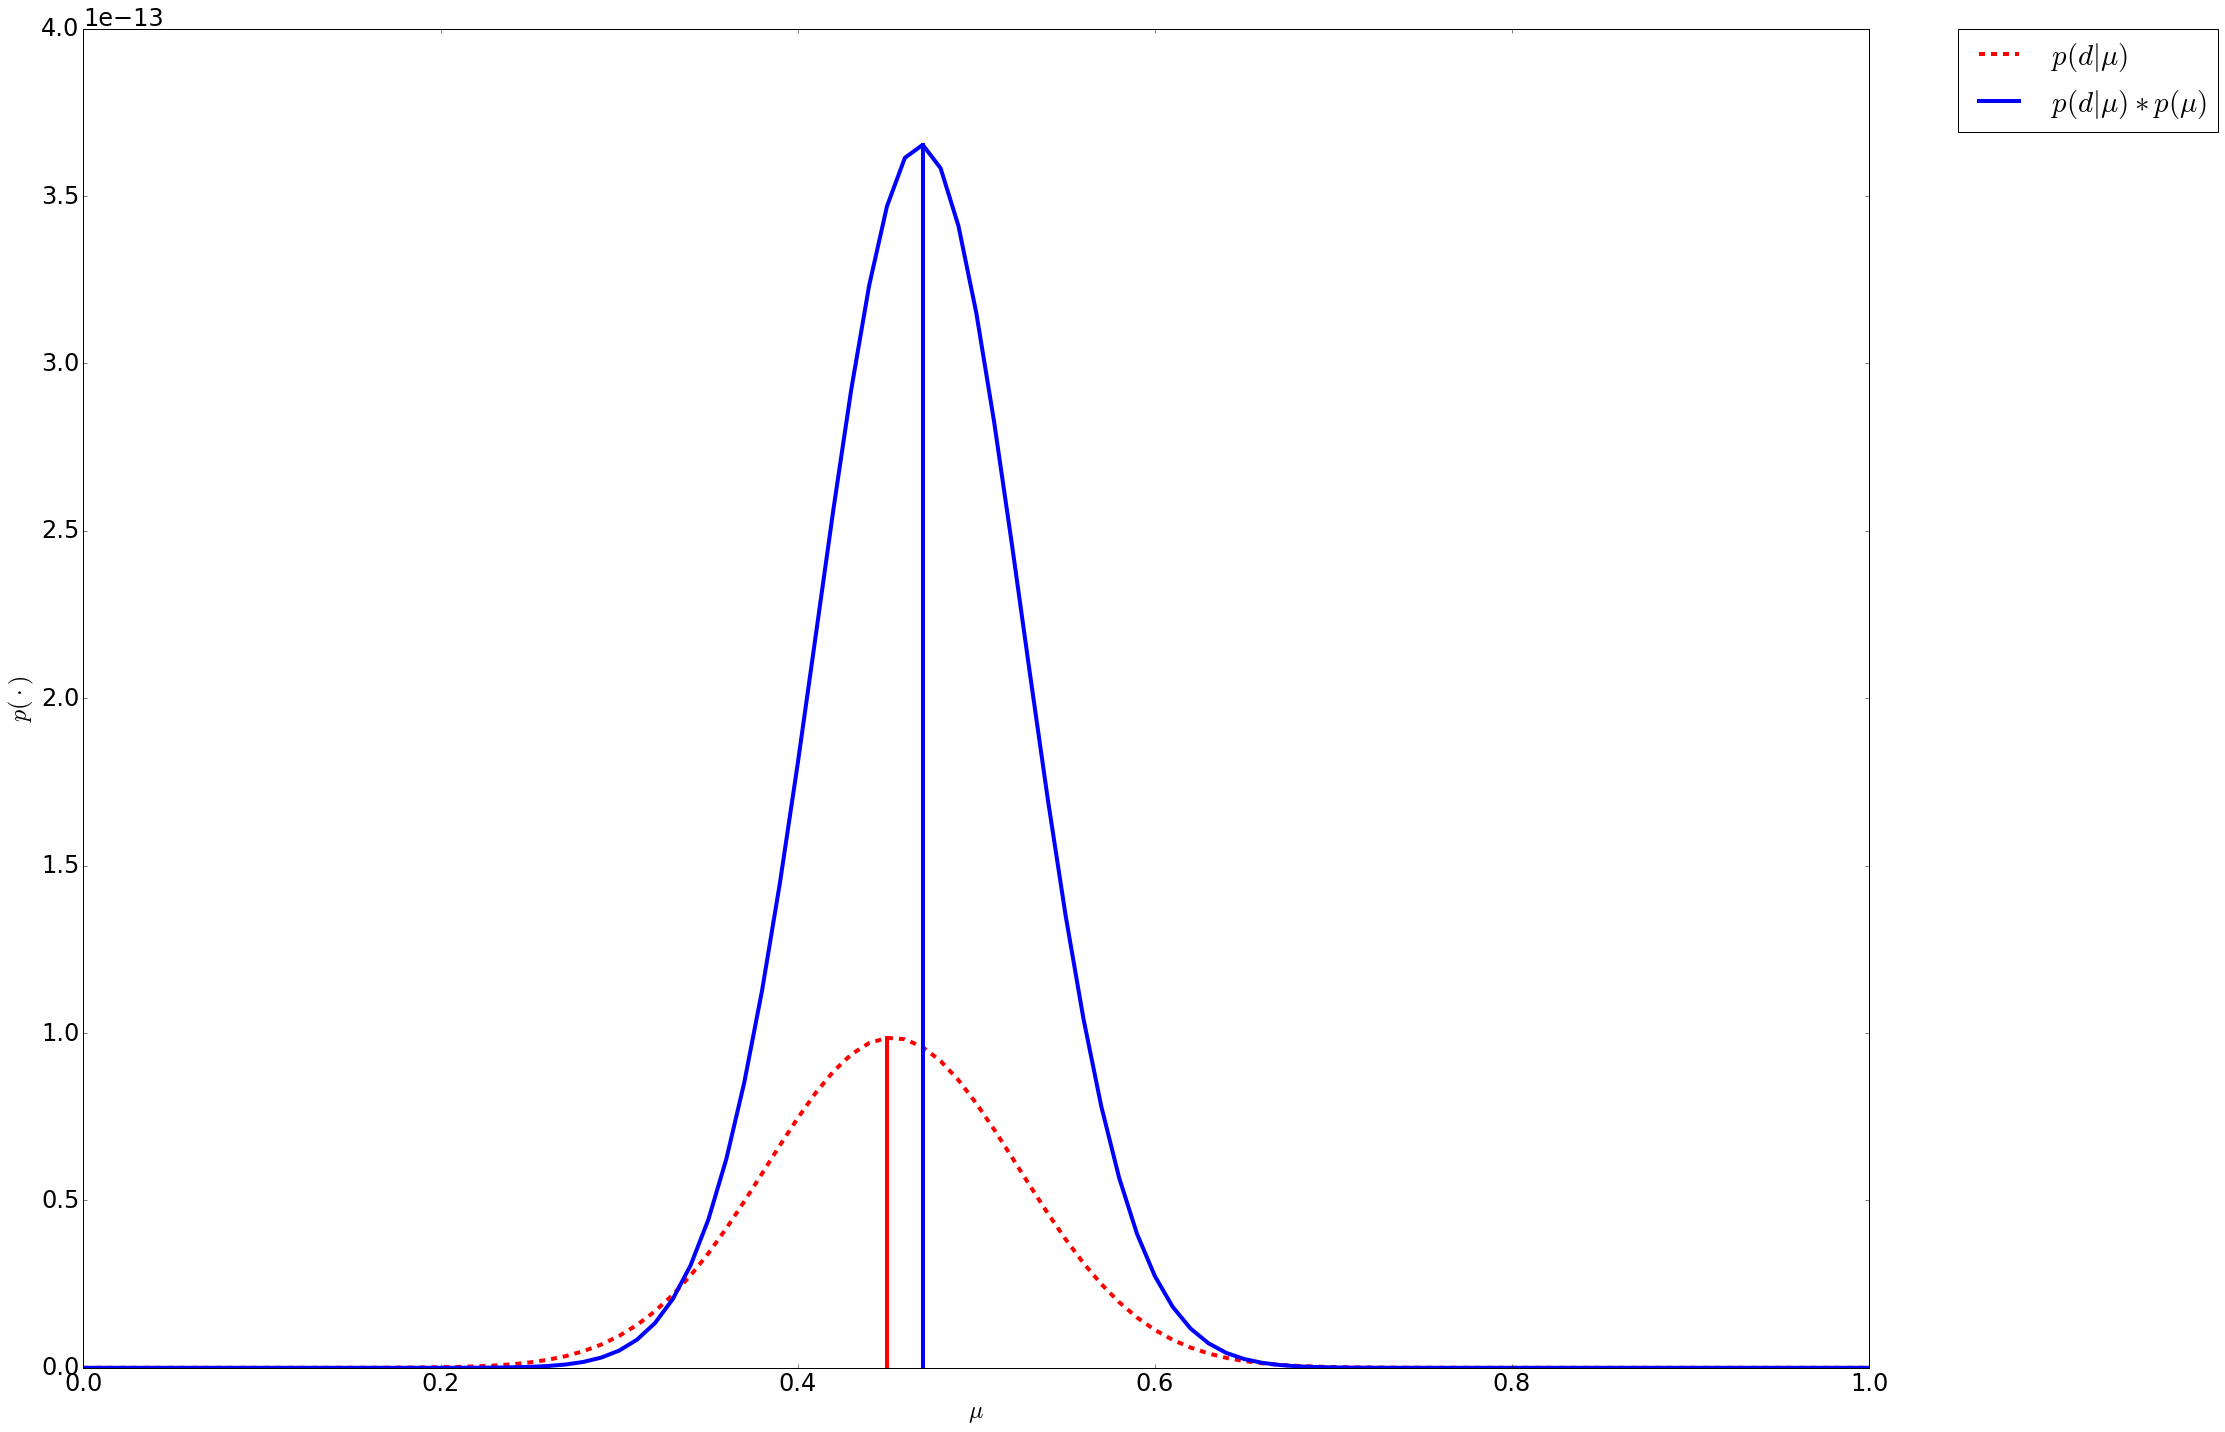

In [24]:
# put your code here

##CORRECT ANSWER##
E = np.loadtxt('data2.dat', delimiter=',')
#
lml_e = loopLikelihood(E)
max_lml_e = lml_e[:, 1].argmax()
print lml_e[max_lml_e, :]
print "The correct value for file `data2.dat` is: ", lml_e[max_lml_e, 0]
#
pos_e = loopPosterior(E)
max_pos_e = pos_e[:, 1].argmax()
print pos_e[max_pos_e, :]
print "The correct value for file `data2.dat` is ", pos_e[max_pos_e, 0]
#
fig_e = plt.figure()
ax_e = fig_e.add_subplot( 111 )
ax_e.plot(lml_e[:, 0], lml_e[:, 1], color='r', linestyle='--', lw=4, label='$p(d|\mu)$')
ax_e.plot( (lml_e[max_lml_e, 0], lml_e[max_lml_e, 0]), (0, lml_e[max_lml_e, 1]), color='r', lw=4 )

ax_e.plot(pos_e[:, 0], pos_e[:, 1], color='b', linestyle='-', lw =4, label='$p(d|\mu)*p(\mu)$')
ax_e.plot( (pos_e[max_pos_e, 0], pos_e[max_pos_e, 0]), (0, pos_e[max_pos_e, 1]), color='b', lw=4 )

ax_e.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_e.set_xlabel('$\mu$')
ax_e.set_ylabel('$p(\cdot)$')

plt.show()

#
##
#

F = np.loadtxt('data3.dat', delimiter=',')
#
lml_f = loopLikelihood(F)
max_lml_f = lml_f[:, 1].argmax()
print lml_f[max_lml_f, :]
print "The correct value for file `data3.dat` is: ", lml_f[max_lml_f, 0]
#
pos_f = loopPosterior(F)
max_pos_f = pos_f[:, 1].argmax()
print pos_f[max_pos_f, :]
print "The correct value for file `data3.dat` is ", pos_f[max_pos_f, 0]
#
fig_f = plt.figure()
ax_f = fig_f.add_subplot( 111 )
ax_f.plot(lml_f[:, 0], lml_f[:, 1], color='r', linestyle='--', lw=4, label='$p(d|\mu)$')
ax_f.plot( (lml_f[max_lml_f, 0], lml_f[max_lml_f, 0]), (0, lml_f[max_lml_f, 1]), color='r', lw=4 )

ax_f.plot(pos_f[:, 0], pos_f[:, 1], color='b', linestyle='-', lw =4, label='$p(d|\mu)*p(\mu)$')
ax_f.plot( (pos_f[max_pos_f, 0], pos_f[max_pos_f, 0]), (0, pos_f[max_pos_f, 1]), color='b', lw=4 )

ax_f.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_f.set_xlabel('$\mu$')
ax_f.set_ylabel('$p(\cdot)$')

plt.show()

##CORRECT ANSWER##

---
<font color="red">Correct answer</font>  
These are the figures for the data files `data2` and `data3` respectively. When the likelihood is further from the suggested prior, we are less confident about our measurements.
![MLE for data2](mle_data2.png)
![MLE for data3](mle_data3.png)

---

**EXTRA 1: **Until now, you assumed $\sigma$ = 0.5. Remove this assumption and estimate $\theta_{MAP} = [\mu_{MAP}, \sigma_{MAP}]$ experimentally by looping through possible values of $\mu$ and $\sigma$. Assume the prior probability for $p(\sigma)$ is $\mathcal{N}(0.5, 0.16)$.

---
Tip: You may need to use `np.nanargmax` instead of `np.argmax`.

In [25]:
# put your code here


##CORRECT ANSWER##
def findMaximumLikelihoodWithPrior(data):
    likelihood = np.zeros(shape=(101*101, 3))
    i = 0
    for mu in np.linspace(0, 1, 101):
        for sigma in np.linspace(0, 1, 101):
            likelihood[i, 0] = mu
            likelihood[i, 1] = sigma
            likelihood[i, 2] = stats.norm.pdf(D, loc=mu, scale=sigma).prod() *\
                stats.norm.pdf(mu, loc=0.5, scale=0.1) *\
                stats.norm.pdf(sigma, loc=0.5, scale=0.4)
            i += 1

    max_l = np.nanargmax(likelihood[:, 2])
    muML, sigmaML = likelihood[max_l, 0:2]
    return muML, sigmaML, likelihood

mu_ML, sigma_ML, likelihood_ML = findMaximumLikelihoodWithPrior(D)
print ("The correct values for file `data1.dat` is mu_ML = ", mu_ML, " and sigma_ML = ", sigma_ML)
##CORRECT ANSWER##

('The correct values for file `data1.dat` is mu_ML = ', 0.63, ' and sigma_ML = ', 0.44)


**EXTRA 2: **Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface` in `Python`).
![MLE mesh](mle2.png)

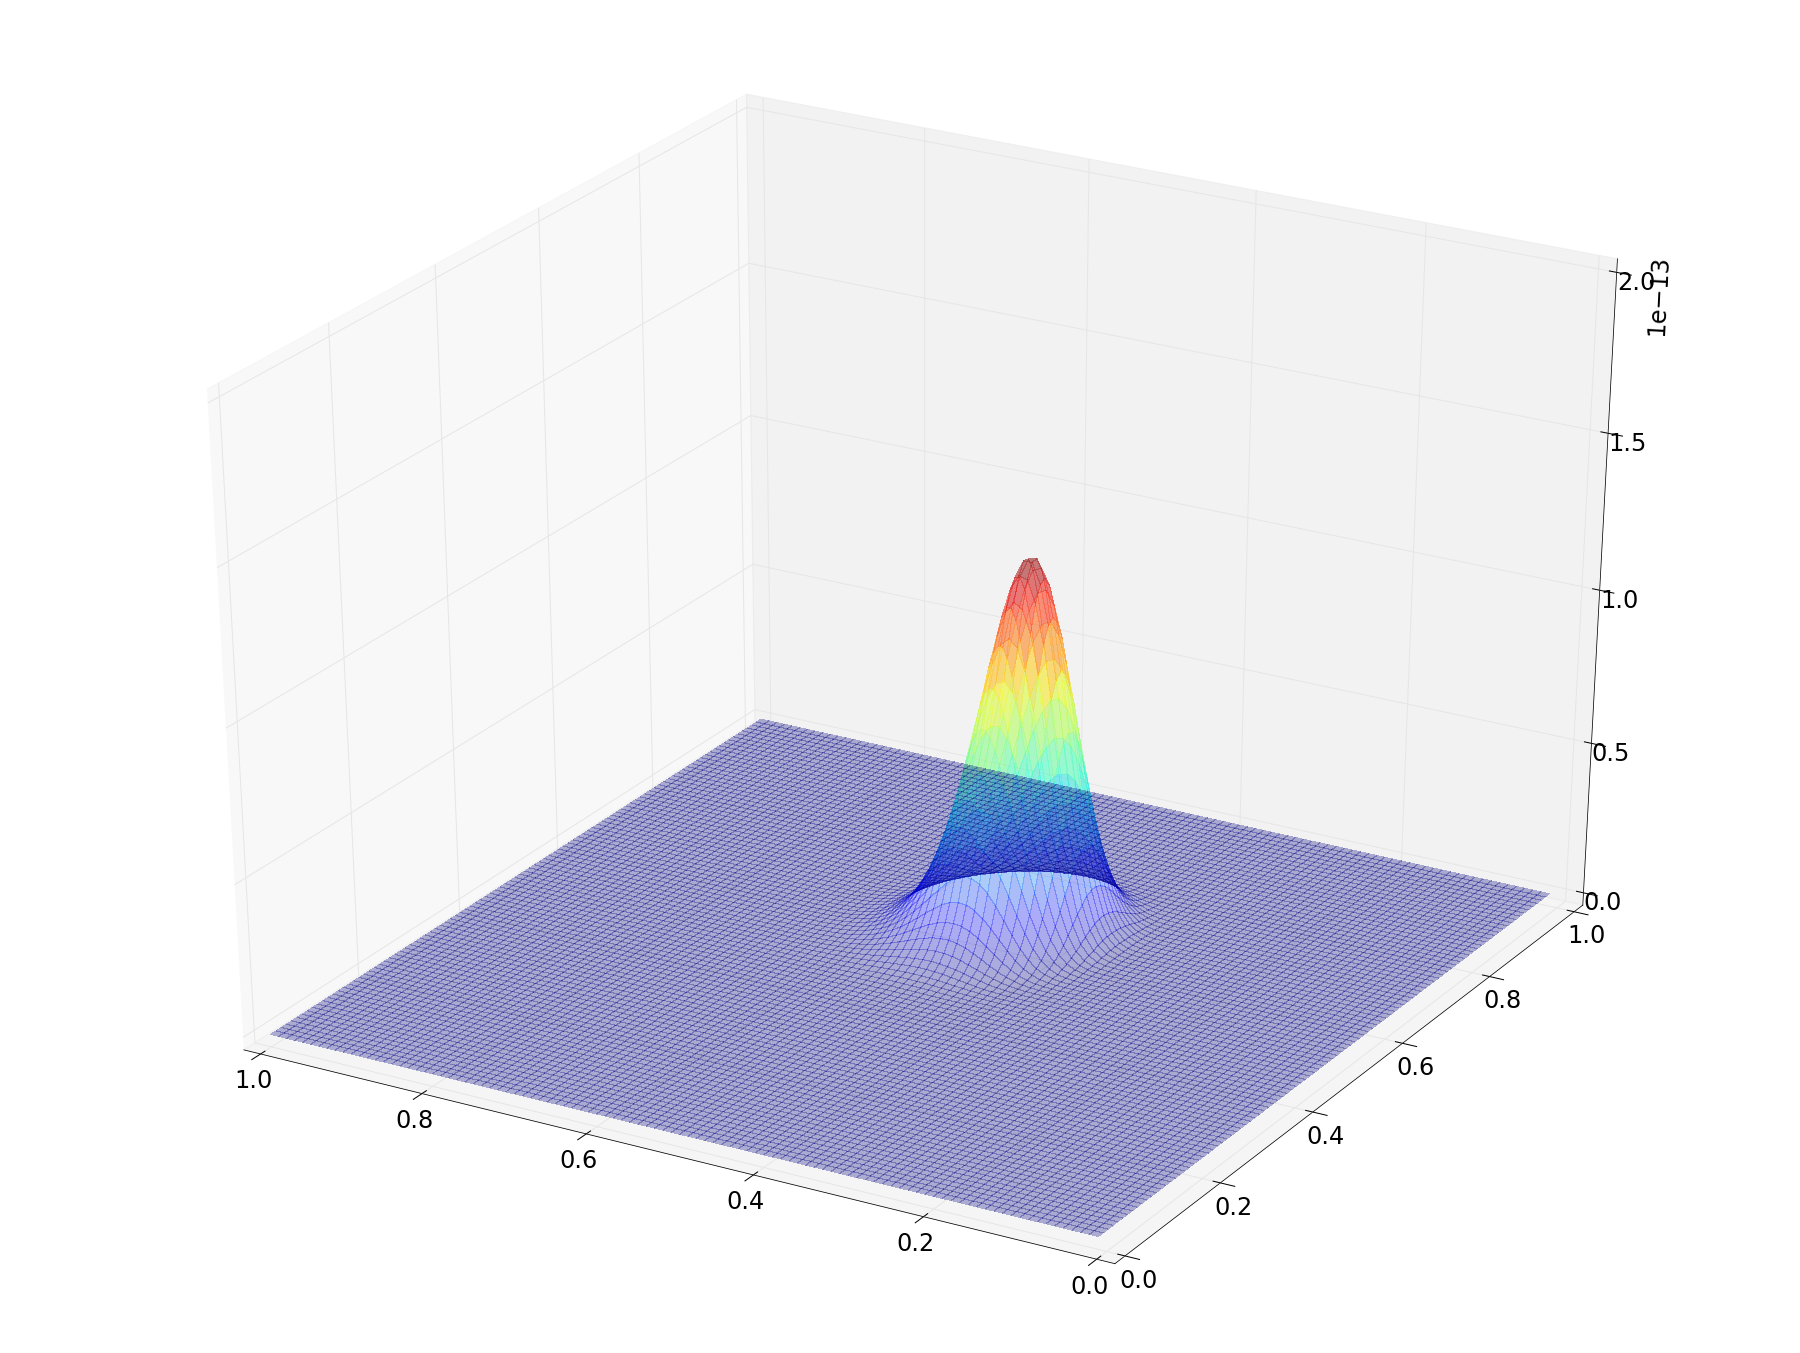

In [26]:
# put your code here

#   z = reshape (likelihood(:,2),101,101);\\
#   meshc(theta,sigma,z);\\

##CORRECT ANSWER##
ls101 = np.linspace(0, 1, 101)
mu_l, sigma_l = np.meshgrid(ls101, ls101)
p_l     = np.reshape(likelihood_ML[:, 2], (101, 101))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mu_l, sigma_l, p_l,\
                vmin=np.nanmin(p_l), vmax=np.nanmax(p_l),\
                rstride=1, cstride=1, cmap=plt.cm.jet, alpha=0.3, linewidth=0, antialiased=False)

ax.set_zlim(0, 2*10**-13)
ax.invert_xaxis()

plt.show()
##CORRECT ANSWER##